In [2]:
import torch

In [2]:
T = torch.tensor([[0.4,0.6], [0.8,0.2]])

In [4]:
T_2 = torch.matrix_power(T, 2) # At iteration T_2 the probability of transistion between states have changed
T_5 = torch.matrix_power(T, 5) 
T_10 = torch.matrix_power(T, 10)
T_15 = torch.matrix_power(T, 15)
T_20 = torch.matrix_power(T, 20)

In [5]:
v = torch.tensor([[0.7, 0.3]]) # Initial distribution of the states, decides which one will be picked

In [9]:
print(f'State probabilities * Transistional matrix: {v.size()} X {T.size()} = {torch.mm(v, T).size()}')

State probabilities * Transistional matrix: torch.Size([1, 2]) X torch.Size([2, 2]) = torch.Size([1, 2])


Which state will be picked if the transistional matrix was T_2, or T_5 ... and so on? 

What does State probabilities * Transistional matrix give? 

$\left[ S_1(P_{S_1\longrightarrow S_1}) + S_2(P_{S_2\longrightarrow S_1})  , \ \ S_{2}(P_{S_1\longrightarrow S_2}) + S_{2}(.P_{S_2\longrightarrow S_2}) \right]$

The first element is the probability that the state 1 is chosen. If the $P(S_2)$ is more, but $P_{S_2\longrightarrow S_1}$ is small and therefore scales down the total sum. 
If the probability of $S_2$ is chosen, then that means the transisitional probability were high enough to bump the state probabilities to get sucked into this state. 

Why take a product of the probabilities? \
$P(new=S_1|old=S_1) = P(S_1)P(S_1 \cap S_1) = P(S_1)(P_{S_1\longrightarrow S_1}) $

In [14]:
v_1 = torch.mm(v, T)
v_2 = torch.mm(v_1, T_2)
v_5 = torch.mm(v_2, T_5)
v_10 = torch.mm(v_5, T_10)
v_15 = torch.mm(v_10, T_15)
v_20 = torch.mm(v_15, T_20)

print("Distribution of states after 1 step:\n{}".format(v_1))
print("Distribution of states after 2 steps:\n{}".format(v_2))
print("Distribution of states after 5 steps:\n{}".format(v_5))
print("Distribution of states after 10 steps:\n{}".format(v_10))
print("Distribution of states after 15 steps:\n{}".format(v_15))
print("Distribution of states after 20 steps:\n{}".format(v_20))


Distribution of states after 1 step:
tensor([[0.5200, 0.4800]])
Distribution of states after 2 steps:
tensor([[0.5632, 0.4368]])
Distribution of states after 5 steps:
tensor([[0.5715, 0.4285]])
Distribution of states after 10 steps:
tensor([[0.5714, 0.4286]])
Distribution of states after 15 steps:
tensor([[0.5714, 0.4286]])
Distribution of states after 20 steps:
tensor([[0.5714, 0.4286]])


In [15]:
print("Transition probability after 2 steps:\n{}".format(T_2))
print("Transition probability after 5 steps:\n{}".format(T_5))
print("Transition probability after 10 steps:\n{}".format(T_10))
print("Transition probability after 15 steps:\n{}".format(T_15))
print("Transition probability after 20 steps:\n{}".format(T_20))

Transition probability after 2 steps:
tensor([[0.6400, 0.3600],
        [0.4800, 0.5200]])
Transition probability after 5 steps:
tensor([[0.5670, 0.4330],
        [0.5773, 0.4227]])
Transition probability after 10 steps:
tensor([[0.5715, 0.4285],
        [0.5714, 0.4286]])
Transition probability after 15 steps:
tensor([[0.5714, 0.4286],
        [0.5714, 0.4286]])
Transition probability after 20 steps:
tensor([[0.5714, 0.4286],
        [0.5714, 0.4286]])


In [17]:
v

tensor([[0.7000, 0.3000]])

In [16]:
torch.mm(v, T_20) 

tensor([[0.5714, 0.4286]])

In [18]:
torch.mm(torch.tensor([[0.9, 0.1]]), T_20) 

tensor([[0.5714, 0.4286]])

Recall: $\left[ S_1(P_{S_1\longrightarrow S_1}) + S_2(P_{S_2\longrightarrow S_1})  , \ \ S_{2}(P_{S_1\longrightarrow S_2}) + S_{2}(.P_{S_2\longrightarrow S_2}) \right]$

Doesn't matter how strong the initial probabilities are, it ends up at the same result.


# T(s,a,s')

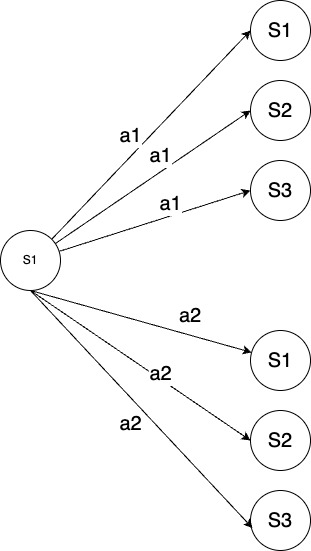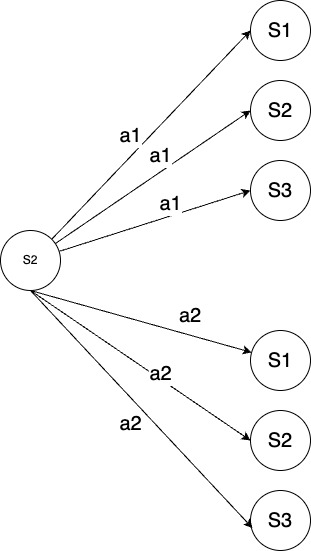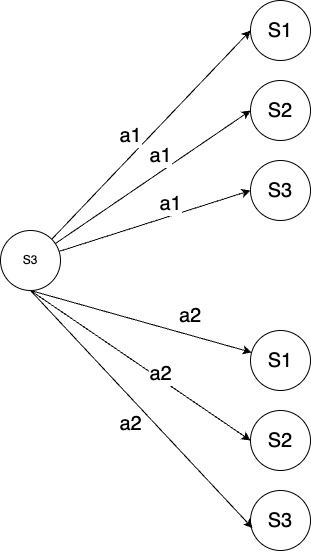

If there is a transition between a state to other states, and there are n actions that you can take, then the number of rows = number of actions. \
But there are 3 starting states, so the entire process will be repeated 3 times, each time for each starting state

# Reward function

The reward is a function, and it is discretely determined for each state. 

- \# of rewards = \# of states 

In [3]:
T = torch.tensor([[[0.8, 0.1, 0.1],
                   [0.1, 0.6, 0.3]],
                  [[0.7, 0.2, 0.1],
                   [0.1, 0.8, 0.1]],
                  [[0.6, 0.2, 0.2],
                    [0.1, 0.4, 0.5]]])

In [6]:
R = torch.tensor([1., 0, -1.]) # Reward
gamma = 0.5 # discount factor

In [7]:
action = 0  # 

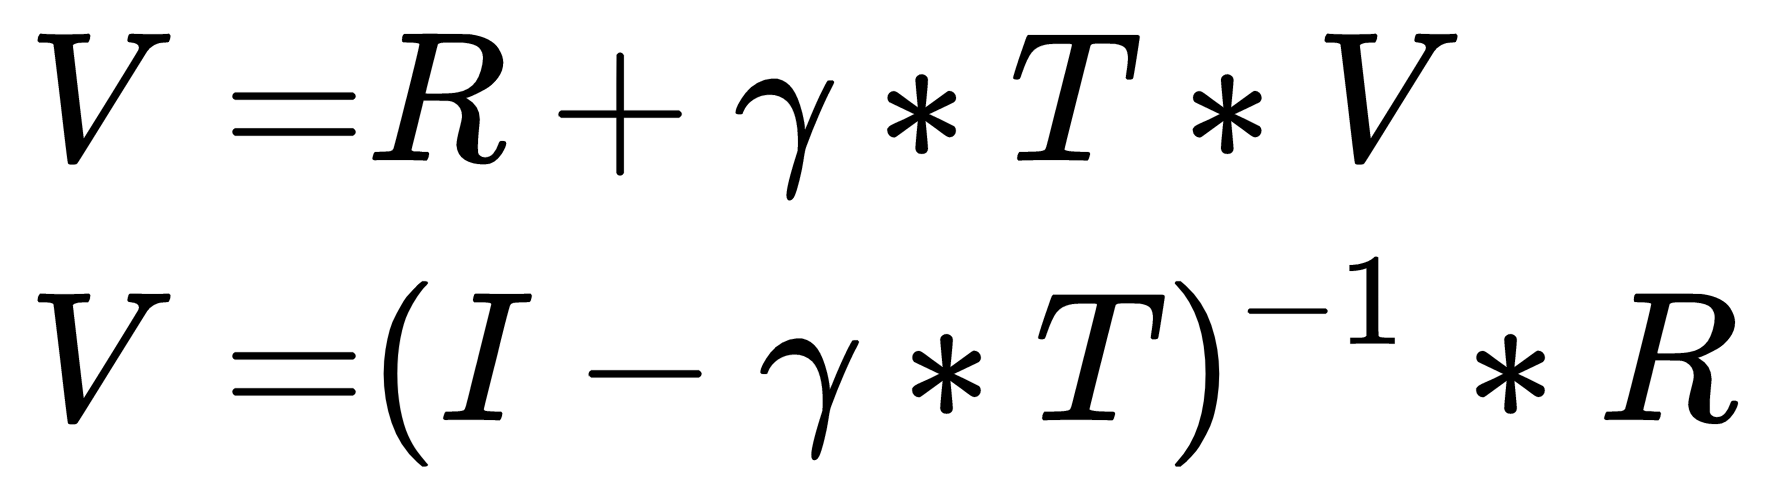

In [13]:
def cal_value_matrix_inversion(gamma, trans_matrix, rewards):
    inv = torch.inverse(torch.eye(rewards.shape[0]) - gamma * trans_matrix) # from before
    V = torch.mm(inv, rewards.reshape(-1, 1))
    return V

In [12]:
trans_matrix = T[:, action] # because the policy is to select action 0 at all times, the trans_matrix gives all the rows with action 0.
V = cal_value_matrix_inversion(gamma, trans_matrix, R)
print("The value function under the optimal policy is:\n{}".format(V))

tensor([[0.8000, 0.1000, 0.1000],
        [0.7000, 0.2000, 0.1000],
        [0.6000, 0.2000, 0.2000]]) 
 tensor([ 1.,  0., -1.])
The value function under the optimal policy is:
tensor([[ 1.6787],
        [ 0.6260],
        [-0.4820]])


Policy associated with a numerical value: Value function \
Value = how good is this policy \
Value is derived from the state agent is in. \
Value is an expectation of the reward if you follow a certain policy. \
## So how are future rewards considered?    
From t+1 to $\infty$, the value will have to be considered, but that is not possible, so they do it till $V_t = V_{t+1}$. And using matrix they can directly do it, without going through iterations.

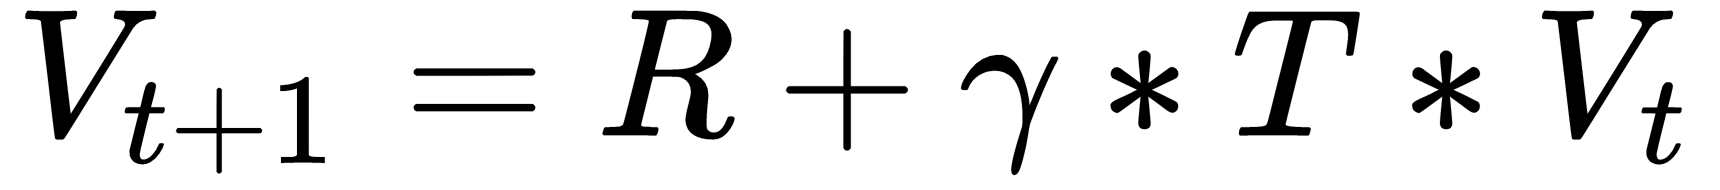

The value at each iteration does not just depend on the immediate reward. However $\gamma$ ensures that immediate reward are prioritized. \
$V_t$ is the reward from before, and $T$ is the policy. 

In [17]:
print(trans_matrix)

tensor([[0.8000, 0.1000, 0.1000],
        [0.7000, 0.2000, 0.1000],
        [0.6000, 0.2000, 0.2000]])


In [15]:
V

tensor([[ 1.6787],
        [ 0.6260],
        [-0.4820]])

In [16]:
torch.mm(trans_matrix, V)

tensor([[1.3573],
        [1.2521],
        [1.0360]])

As value is given for all states, which value/state to consider is given by the trans_matrix. 

$\begin{pmatrix}
v_1 \\
v_2 \\
\end{pmatrix} \to 
\begin{pmatrix}
v_1 \\
v_2 \\
\end{pmatrix}\to 
\begin{pmatrix}
v_1 \\
v_2 \\
\end{pmatrix}\to 
\begin{pmatrix}
v_1 \\
v_2 \\
\end{pmatrix}$

t -> t+1 -> ..

The value of different states change throughout the actual iterations (Fake iteration: Estimates the value by solving the inverse operation)

Limitations of inverse method:

- What if the number of states is 10,000 (huge), then inversing it is expensive. (curse of dimensionality)
- Instead they do policy evaluation.